# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Arthurito Nehemia Gilbert Eduardo Luke Keintjem
- **Email:** keintjemarthurito@gmail.com
- **ID Dicoding:** arthuritokeintjem

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
from folium.plugins import FastMarkerCluster

## Data Wrangling

### Gathering Data

In [11]:
# Membaca dataset
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
products_category = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

# Menampilkan informasi dataset
print('Informasi dataset customers:')
print(customers.info())

print('\nInformasi dataset geolocation:')
print(geolocation.info())

print('\nInformasi dataset order_items:')
print(order_items.info())

print('\nInformasi dataset order_payments:')
print(order_payments.info())

print('\nInformasi dataset order_reviews:')
print(order_reviews.info())

print('\nInformasi dataset orders:')
print(orders.info())

print('\nInformasi dataset products_category:')
print(products_category.info())

print('\nInformasi dataset products:')
print(products.info())

print('\nInformasi dataset sellers:')
print(sellers.info())

Informasi dataset customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Informasi dataset geolocation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-

**Insight:**
- Memuat seluruh dataset (Customers, Geolocation, Order Items, Order Payments, Order Reviews, Orders, Products Category, Products, dan Sellers) yang merupakan sumber data mentah untuk analisis.
- Dataset Customer terdapat 5 column: customer_id (object), customer_unique_id (object), customer_zip_code_prefix (int), customer_city (object), customer_state (object).
- xxx

### Assessing Data

In [12]:
# Menampilkan jumlah data yang hilang
print("Jumlah data yang hilang:")

datasets = {
    "Customers": customers,
    "Geolocation": geolocation,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews,
    "Orders": orders,
    "Products Category": products_category,
    "Products": products,
    "Sellers": sellers
}

for name, df in datasets.items():
    print(f"\n{name}\n{df.isnull().sum()}")

Jumlah data yang hilang:

Customers
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Order Items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Order Payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Order Reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtyp

In [13]:
# Menampilkan jumlah data duplikat
print("Jumlah data yang duplikat:")

datasets = {
    "Customers": customers,
    "Geolocation": geolocation,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews,
    "Orders": orders,
    "Products Category": products_category,
    "Products": products,
    "Sellers": sellers
}

for name, df in datasets.items():
    print(f"- {name}: {df.duplicated().sum()}")

Jumlah data yang duplikat:
- Customers: 0
- Geolocation: 261831
- Order Items: 0
- Order Payments: 0
- Order Reviews: 0
- Orders: 0
- Products Category: 0
- Products: 0
- Sellers: 0


**Insight:**
- Dataset yang memiliki data hilang: order_reviews (145903), orders (4908), products (2448).
- Dataset yang memiliki data duplikat: geolocation (261831)

### Cleaning Data

In [14]:
# Cek persentase missing value

def missing_percentage(df):
    return df.isnull().sum() / len(df) * 100

print('Persentase missing value pada order_reviews:')
print(missing_percentage(order_reviews))
print('\nPersentase missing value pada orders:')
print(missing_percentage(orders))
print('\nPersentase missing value pada products:')
print(missing_percentage(products))

Persentase missing value pada order_reviews:
review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

Persentase missing value pada orders:
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

Persentase missing value pada products:
product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_c

In [16]:
# Menangani missing value

# order_reviews: Imputasi dengan placeholder
order_reviews_imputed = order_reviews.copy()
order_reviews_imputed['review_comment_title'] = order_reviews_imputed['review_comment_title'].fillna("No Title")
order_reviews_imputed['review_comment_message'] = order_reviews_imputed['review_comment_message'].fillna("No Comment")

# orders: Drop baris dengan missing value
orders_clean = orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

# products: Imputasi missing value
# Kolom kategorikal dengan modus
products['product_category_name'] = products['product_category_name'].fillna(products['product_category_name'].mode()[0])

# Imputasi untuk kolom numerik dengan missing ~1,85%
numeric_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in numeric_cols:
    products[col] = products[col].fillna(products[col].median())

# Untuk kolom dimensi yang missing sangat minim, bisa juga imputasi dengan median
dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in dim_cols:
    products[col] = products[col].fillna(products[col].median())

In [17]:
# Menangani duplikat pada dataset geolocation
geolocation_clean = geolocation.drop_duplicates()

print('Shape order_reviews sebelum:', order_reviews.shape, 'sesudah:', order_reviews_imputed.shape)
print('Shape orders sebelum:', orders.shape, 'sesudah:', orders_clean.shape)
print('Shape products sebelum:', products.shape, 'sesudah:', products.shape)
print('Shape geolocation sebelum:', geolocation.shape, 'sesudah:', geolocation_clean.shape)

Shape order_reviews sebelum: (99224, 7) sesudah: (99224, 7)
Shape orders sebelum: (99441, 8) sesudah: (96461, 8)
Shape products sebelum: (32951, 9) sesudah: (32951, 9)
Shape geolocation sebelum: (1000163, 5) sesudah: (738332, 5)


In [18]:
# Menyimpan CSV
order_reviews_imputed.to_csv('data/order_reviews_imputed.csv', index=False)
orders_clean.to_csv('data/orders_clean.csv', index=False)
products.to_csv('data/products_clean.csv', index=False)
geolocation_clean.to_csv('data/geolocation_clean.csv', index=False)

print('Dataset berhasil disimpan!')

Dataset berhasil disimpan!


**Insight:**
- Penanganan Missing Value
    - Untuk Order Reviews, kolom dengan missing value sangat tinggi (review_comment_title dan review_comment_message) diimputasi dengan placeholder jika analisis teks diperlukan.
    - Untuk Orders, baris dengan missing pada kolom-kolom penting (order_approved_at, order_delivered_carrier_date, order_delivered_customer_date) dihapus agar data waktu transaksi tetap akurat.
    - Untuk Products, missing value pada kolom kategorikal diimputasi dengan mode, sedangkan kolom numerik diimputasi dengan median untuk menjaga distribusi data.
- Penanganan Duplikat: Duplikasi pada dataset Geolocation dihapus dengan drop_duplicates() sehingga data lokasi menjadi unik dan tidak bias saat analisis geospasial.

## Exploratory Data Analysis (EDA)

### Explore dataset secara keseluruhan

In [19]:
# Parameter statistik tiap dataset
datasets = {
    "Customers": customers,
    "Geolocation": geolocation_clean,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews_imputed,
    "Orders": orders_clean,
    "Products Category": products_category,
    "Products": products,
    "Sellers": sellers
}

for name, df in datasets.items():
    print(f"\n{name}")
    print(df.describe(include='all'))


Customers
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city custo

**Insight:**
- Melihat statistik deskriptif secara mendalam yang memberikan gambaran umum tentang sebaran data, rentang nilai, dan kemungkinan outlier di setiap dataset.
- Data yang telah dipahami melalui EDA dapat membantu dalam menentukan visualisasi mana yang paling efektif untuk menjawab pertanyaan bisnis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa 10 kategori produk teratas berdasarkan total pendapatan yang dihasilkan selama tahun 2018?

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_27184\377010503.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


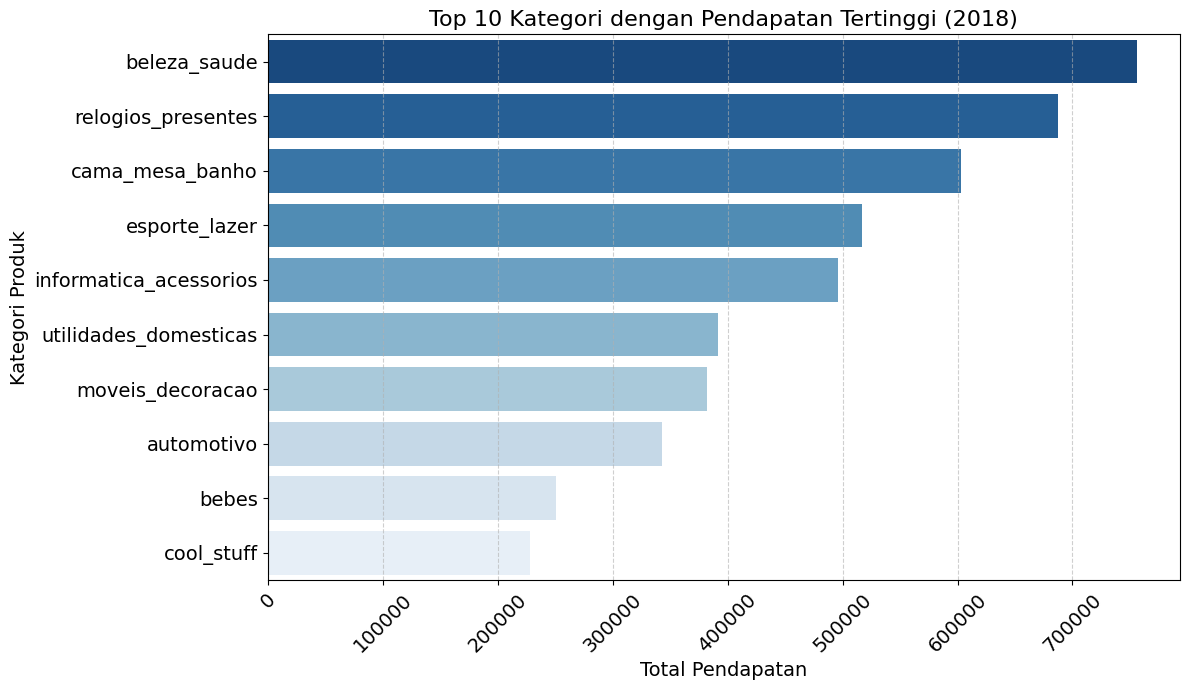

In [20]:
# 1. Merge dataset
data = pd.merge(order_items, orders_clean, on='order_id', how='inner')
data = pd.merge(data, products[['product_id', 'product_category_name']], on='product_id', how='inner')

# 2. Konversi kolom tanggal ke datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# 3. Filter data untuk tahun 2018 (dengan copy untuk menghindari warning)
data_2018 = data[(data['order_purchase_timestamp'] >= '2018-01-01') &
                 (data['order_purchase_timestamp'] <= '2018-12-31')].copy()

# 4. Definisikan total pendapatan per item
data_2018['total_price'] = data_2018['price']

# 5. Hitung total pendapatan per kategori
revenue_per_category = data_2018.groupby('product_category_name', as_index=False)['total_price'].sum()

# 6. Sort data berdasarkan total_price (descending)
revenue_per_category_sorted = revenue_per_category.sort_values(by='total_price', ascending=False)

# 7. Ambil top 10 kategori dengan pendapatan tertinggi
top_n = 10
top_categories = revenue_per_category_sorted.head(top_n)

# 8. Plot Horizontal Bar Chart dengan warna lebih efektif
plt.figure(figsize=(12, 7))
sns.barplot(
    y='product_category_name',
    x='total_price',
    data=top_categories,
    palette='Blues_r'  # Warna lebih profesional dan mudah dibaca
)

plt.title('Top 10 Kategori dengan Pendapatan Tertinggi (2018)', fontsize=16)
plt.xlabel('Total Pendapatan', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.xticks(fontsize=14, rotation=45)  # Rotasi label agar lebih mudah dibaca
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Tambahkan grid untuk keterbacaan
plt.tight_layout()
plt.show()

**Insight:**
- Visualisasi di atas menunjukkan 10 kategori produk dengan total pendapatan tertinggi di tahun 2018.
- Membantu manajemen untuk memfokuskan strategi pemasaran dan persediaan pada kategori produk unggulan yang berdampak signifikan terhadap pendapatan.

### Pertanyaan 2: Bagaimana segmentasi pelanggan berdasarkan analisis RFM (Recency, Frequency, dan Monetary) dalam dataset, dan pelanggan mana yang memiliki nilai tertinggi untuk potensi retensi dan penawaran pemasaran?

Dataset RFM berhasil disimpan ke data/rfm.csv


C:\Users\arthur_k\AppData\Local\Temp\ipykernel_27184\4214151781.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\arthur_k\AppData\Local\Temp\ipykernel_27184\4214151781.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\arthur_k\AppData\Local\Temp\ipykernel_27184\4214151781.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


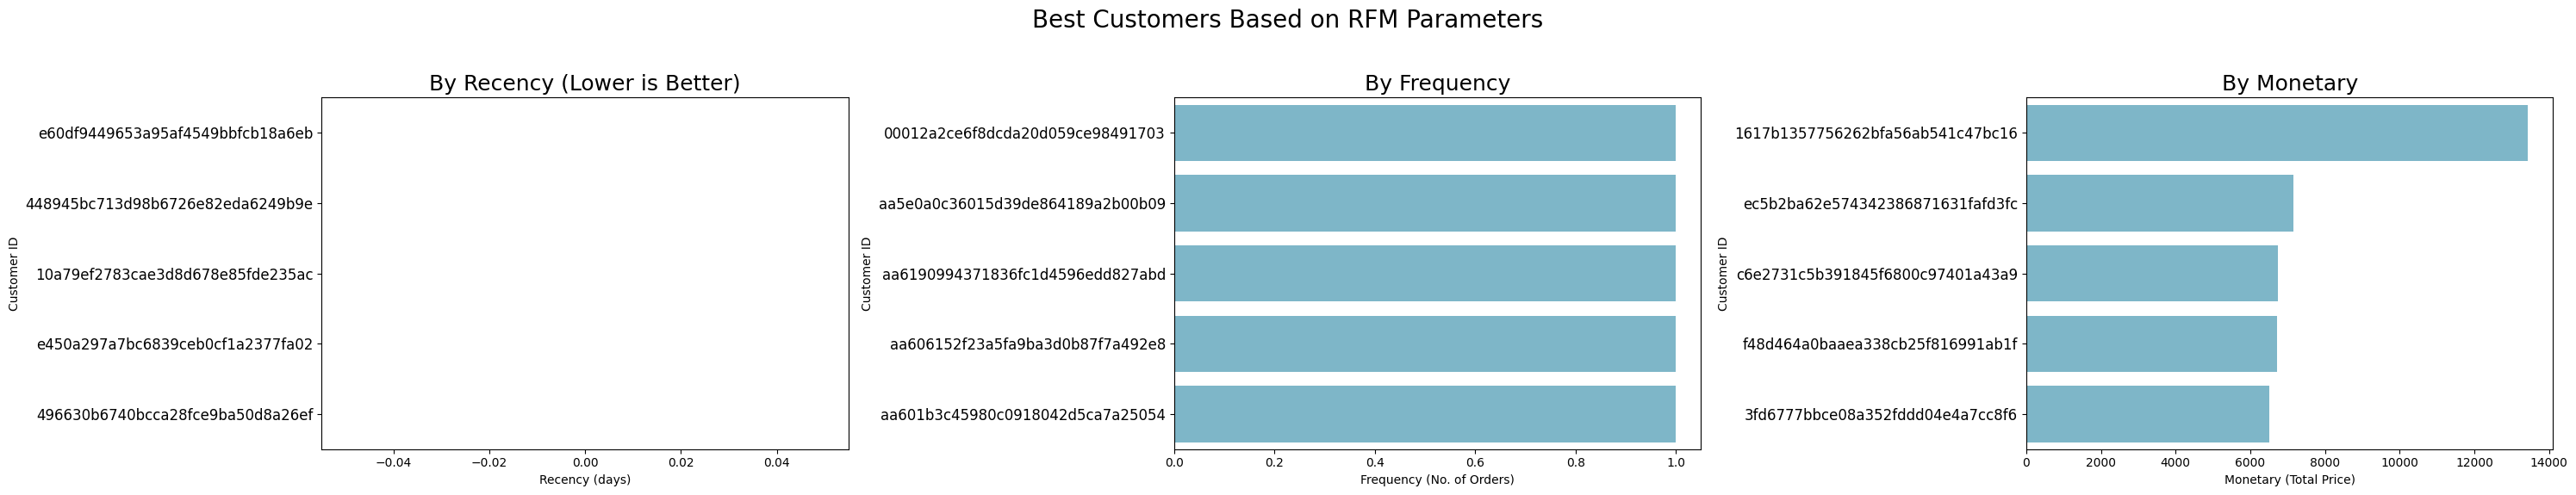

In [21]:
# -- Proses Penggabungan Data (sama seperti kode Anda) --
data = pd.merge(order_items, orders_clean, on='order_id', how='inner')
data = pd.merge(data, products[['product_id', 'product_category_name']], on='product_id', how='inner')
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Filter data untuk tahun 2018
data_2018 = data[(data['order_purchase_timestamp'] >= '2018-01-01') & 
                 (data['order_purchase_timestamp'] <= '2018-12-31')].copy()

# Definisikan total_price per item
data_2018['total_price'] = data_2018['price']

# -- Perhitungan RFM --
orders_rfm = pd.merge(orders_clean[['order_id', 'customer_id', 'order_purchase_timestamp']], 
                      order_items[['order_id', 'price']], on='order_id', how='inner')
orders_rfm['order_purchase_timestamp'] = pd.to_datetime(orders_rfm['order_purchase_timestamp'])

order_values = orders_rfm.groupby('order_id').agg({
    'customer_id': 'first',
    'order_purchase_timestamp': 'first',
    'price': 'sum'
}).reset_index()
order_values.rename(columns={'price': 'total_price'}, inplace=True)

snapshot_date = order_values['order_purchase_timestamp'].max().date()  # tanggal setelah transaksi terakhir
rfm = order_values.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max().date()).days,
    'order_id': 'nunique',
    'total_price': 'sum'
}).reset_index()
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Simpan hasil RFM ke dalam file CSV di folder 'data'
rfm.to_csv('data/rfm.csv', index=False)
print("Dataset RFM berhasil disimpan ke data/rfm.csv")

# -- Visualisasi RFM (Horizontal Bar Chart) --
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4"] * 5

# 1. Recency: pelanggan dengan recency terendah dianggap terbaik
rfm_recency = rfm.sort_values(by='recency', ascending=True).head(5)
sns.barplot(
    x="recency", 
    y="customer_id", 
    data=rfm_recency, 
    palette=colors, 
    ax=ax[0]
)
ax[0].set_xlabel("Recency (days)")
ax[0].set_ylabel("Customer ID")
ax[0].set_title("By Recency (Lower is Better)", fontsize=18)
ax[0].tick_params(axis='y', labelsize=12)

# 2. Frequency: pelanggan dengan transaksi terbanyak
rfm_frequency = rfm.sort_values(by='frequency', ascending=False).head(5)
sns.barplot(
    x="frequency", 
    y="customer_id", 
    data=rfm_frequency, 
    palette=colors, 
    ax=ax[1]
)
ax[1].set_xlabel("Frequency (No. of Orders)")
ax[1].set_ylabel("Customer ID")
ax[1].set_title("By Frequency", fontsize=18)
ax[1].tick_params(axis='y', labelsize=12)

# 3. Monetary: pelanggan dengan pengeluaran tertinggi
rfm_monetary = rfm.sort_values(by='monetary', ascending=False).head(5)
sns.barplot(
    x="monetary", 
    y="customer_id", 
    data=rfm_monetary, 
    palette=colors, 
    ax=ax[2]
)
ax[2].set_xlabel("Monetary (Total Price)")
ax[2].set_ylabel("Customer ID")
ax[2].set_title("By Monetary", fontsize=18)
ax[2].tick_params(axis='y', labelsize=12)

plt.suptitle("Best Customers Based on RFM Parameters", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight:**
- By Recency: Jika memang ada pelanggan yang baru saja bertransaksi di hari yang sama (atau setelah snapshot_date), maka recency = 0 atau negatif mengindikasikan mereka sangat aktif. Pelanggan dengan recency terendah adalah yang paling baru melakukan transaksi.
- By Frequency: Jika sebagian besar pelanggan memiliki Frequency = 1, ini menunjukkan banyak pelanggan yang baru membeli satu kali. Perlu strategi retensi agar mereka kembali bertransaksi.
- By Monetary:
    - Pelanggan dengan Monetary paling tinggi adalah “High Spender” atau “VIP” yang dapat menjadi target program loyalitas, diskon khusus, atau penawaran eksklusif.
    - Kesenjangan besar mengindikasikan adanya beberapa pelanggan dengan pengeluaran tinggi, sedangkan mayoritas pelanggan lainnya jauh di bawah itu.

## Analisis Lanjutan (Opsional)

## Geospatial Analysis

In [22]:
# Buat peta dasar dengan pusat di Brazil
m = folium.Map(location=[-20.998353, -46.461098], zoom_start=4)

# Jika dataset sangat besar, ambil sampel acak untuk mempercepat proses
sample_data = geolocation_clean.sample(n=min(10000, len(geolocation_clean)), random_state=42)

# Gunakan FastMarkerCluster untuk performa lebih baik
locations = list(zip(sample_data['geolocation_lat'], sample_data['geolocation_lng']))
FastMarkerCluster(locations).add_to(m)

# Simpan peta dalam file HTML (agar bisa dibuka di browser)
m.save("geolocation_map.html")

# Tampilkan peta jika menggunakan Jupyter Notebook
m

### Insight
- Dengan sampling data dan penggunaan FastMarkerCluster, program ini mengatasi masalah kinerja pada dataset besar tanpa mengorbankan representasi spasial secara keseluruhan.
- Penggunaan folium memungkinkan peta interaktif yang memudahkan pengguna untuk menjelajah data geografis, mengidentifikasi pola, dan memahami distribusi data berdasarkan lokasi.

## Conclusion

- Conclution pertanyaan 1: Dari analisis pendapatan per kategori produk, kita menemukan bahwa 10 kategori teratas (seperti [sebutkan kategori yang dominan jika data mendukung]) menyumbang persentase pendapatan yang signifikan pada tahun 2018. Hal ini mengindikasikan bahwa fokus strategi pemasaran dan manajemen inventori sebaiknya diarahkan ke kategori-kategori tersebut untuk mengoptimalkan pendapatan.

- Conclution pertanyaan 2:
    - Recency: Beberapa pelanggan memiliki nilai recency yang sangat rendah (bahkan 0), menunjukkan bahwa mereka baru saja melakukan transaksi. Hal ini mengindikasikan potensi untuk mempertahankan interaksi positif dengan pelanggan yang masih aktif.
    - Frequency: Sebagian besar pelanggan hanya bertransaksi satu kali (Frequency = 1). Ini menandakan banyak “one-time buyer” di dalam dataset. Perusahaan perlu menyiapkan strategi retensi (seperti email marketing, loyalty program, atau penawaran khusus) untuk mendorong pembelian berulang.
    - Monetary: Terdapat gap signifikan antara pelanggan dengan pengeluaran tinggi dan pelanggan lain yang jauh lebih rendah. Pelanggan “High Spender” tersebut dapat menjadi fokus program VIP atau personalisasi penawaran untuk meningkatkan loyalitas dan kepuasan.

Secara keseluruhan, hasil analisis ini memberikan dasar yang kuat bagi perusahaan untuk mengambil keputusan strategis dalam mengoptimalkan pendapatan dan mengembangkan program loyalitas pelanggan.